In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from numpy.fft import rfft

In [2]:
def plot_x_and_rfft(x):
    fft = rfft(x)
    plt.figure(figsize=(12, 4))
    
    plt.subplot(211)
    plt.title("Time Series")
    plt.plot(x)
    
    plt.subplot(212)
    plt.plot(fft.real, label="real")
    plt.plot(fft.imag, label="imag")
    plt.title("Real and imaginary part of DFT coefficients A(k)")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

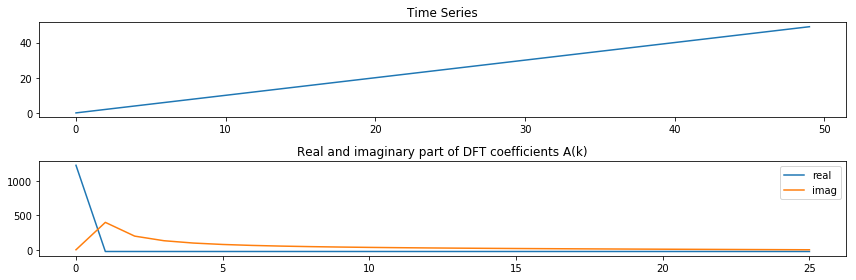

In [3]:
plot_x_and_rfft(range(50))

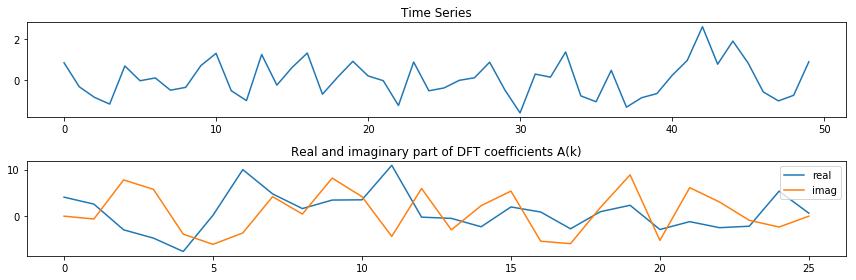

In [4]:
plot_x_and_rfft(np.random.normal(size=50))

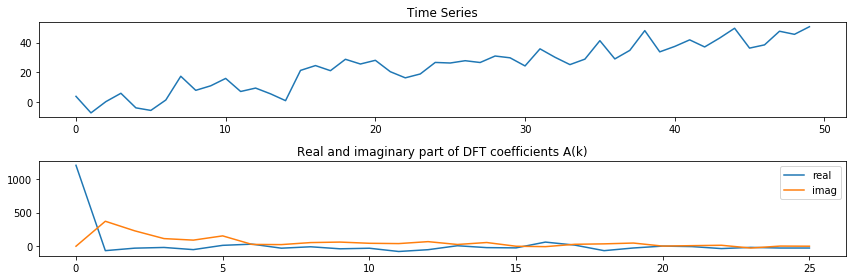

In [5]:
plot_x_and_rfft(range(50) + np.random.normal(loc=0.1, scale=5, size=50))